In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Read pair of numbers from data.csv separated by a space using pandas
data = pd.read_csv('data.txt', sep=' ')

# update using data['x_scaled'] = data['x'] * data['s']
data['x'] = data['x'] * data['s']
data['y'] = data['y'] * data['s']

In [3]:
# Compute the error in x and y
epsilon = 0.3

data['x_err'] = data['x']*np.sqrt((0.3 * data['s'] / data['x'])**2 + (0.35/18.85)**2)
data['y_err'] = np.sqrt((0.35 * data['s'])**2 + (data['y']*0.018)**2)

In [4]:
f = 1/0.725

In [5]:
data = data * f

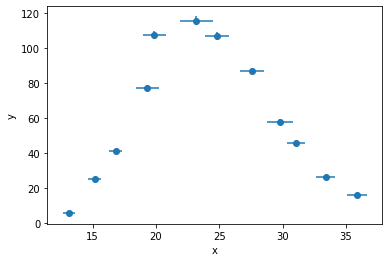

In [6]:
# Make a scatter plot of the data with error bars for x and y
plt.errorbar(data['x'], data['y'], xerr=data['x_err'], yerr=data['y_err'], fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
def normal(x, mu, sigma, y_mu):
    return y_mu * np.exp(-(x-mu)**2/(2*sigma**2))

def lognormal(x, mu, sigma, y_mu):
    return y_mu * mu/x * np.exp(-(np.log(x)-np.log(mu))**2/(2*sigma**2))

def laplacian(x, mu, sigma, y_mu):
    return y_mu * np.exp(-np.abs(x-mu)/sigma)

In [12]:
def fit_to_curve(f, data, text):
    # Fit data to normal distribution
    popt, pcov = curve_fit(f, data['x'], data['y'], p0=[17.5, 1, 20])

    # Plot it out
    plt.figure(figsize=(15, 8))
    # Make labels bigger
    plt.rc('font', size=30)
    # Use latex font
    plt.rc('text', usetex=True)

    x = np.linspace(min(data['x'])-5, max(data['x'])+5, 100)
    y = f(x, *popt)
    plt.errorbar(data['x'], data['y'], xerr=data['x_err'], yerr=data['y_err'], fmt='o')
    plt.plot(x, y)
    plt.xlabel('x-axis length (units)')
    plt.ylabel('y-axis length (units)')

    # Compute the root mean square error
    y_fit = f(data['x'], *popt)
    rms = np.sqrt(np.mean((data['y'] - y_fit)**2))
    print('RMS error: {}'.format(rms))

    # Compute chi squared
    chi_squared = 0
    for i in range(len(data['x'])):
        error = max(data['y_err'][i], data['x_err'][i],
        abs(0.5*(f(data['x'][i] + data['x_err'][i], *popt) - f(data['x'][i]-data['x_err'][i], *popt))))
        chi_squared += ((data['y'][i] - y_fit[i]) / error)**2

    chi_squared_r = chi_squared / (len(data['y']) - len(popt))
    print('Chi squared: {}'.format(chi_squared))

    # Save the graph
    plt.savefig(f'{text}.png', dpi=300)
    plt.show()


RMS error: 7.589478521705271
Chi squared: 28.700612585864164


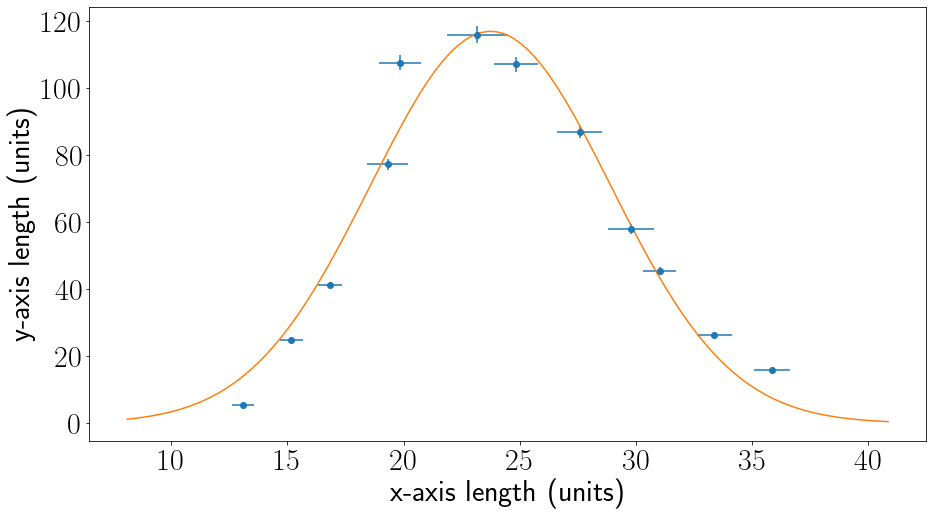

RMS error: 5.043664677734735
Chi squared: 2.955929781147683


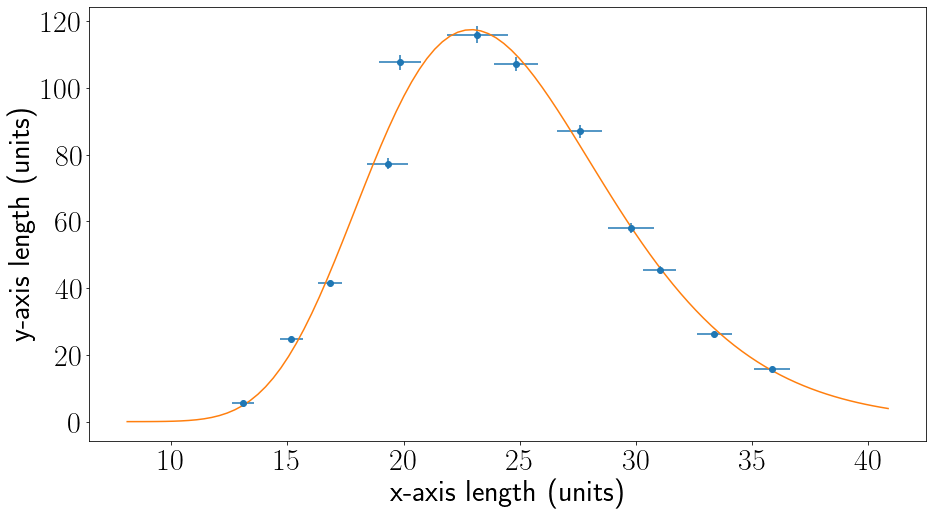

RMS error: 13.145300048493086
Chi squared: 153.4364894524234


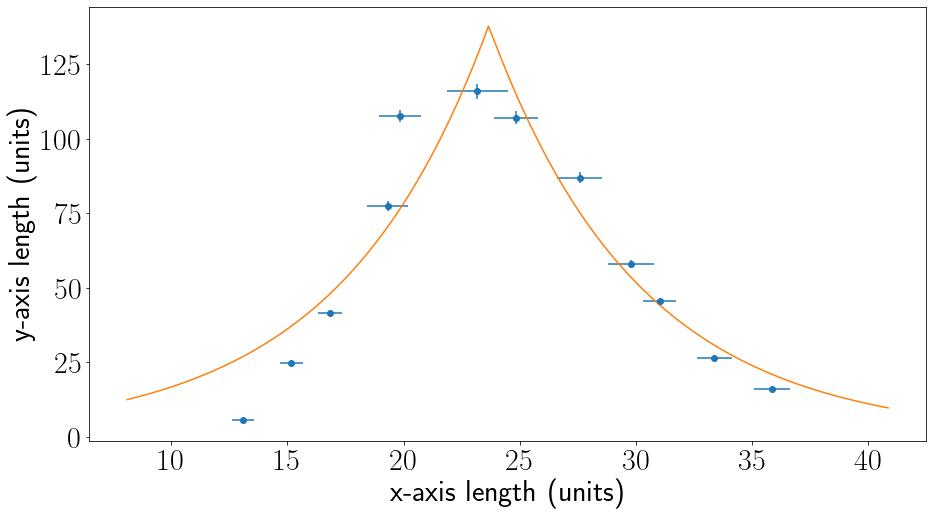

In [13]:
fit_to_curve(normal,data,"normal")
fit_to_curve(lognormal,data,"lognormal")
fit_to_curve(laplacian,data,"laplacian")